In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters 

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [15]:
print(f"Train data set shape: {train_data.shape}")
print(f"First record len: {len(train_data[0])} Second record len: {len(train_data[1])}")

# here the data set has 8982 samples of different lengths

print(f"10th label: {train_labels[9]} 11th label: {train_labels[10]}")
# labels are integers between 0 and 45

Train data set shape: (8982,)
First record len: 87 Second record len: 56
10th label: 16 11th label: 3


In [16]:
# decode 
def decode(review):  # is a vector of integers which is an imdb review. 
    word_index = reuters.get_word_index()
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in review])
    return decoded_review

#print(decode(train_data[0]))

## 2. Prepare the data 
Vectorize the training data and one hot encode the labels which is the most popular encoding mechanism for categorical data that is not binary. 

In [19]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):  # we vectorize each integer in 10k dim. vector
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1  # set results to 1 where we have a sequence of integers and rest are zeros in the 10k 
    return results

In [20]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(f"shape of x_train: {x_train.shape}")
print(f"shape of x_test: {x_test.shape}")

shape of x_train: (8982, 10000)
shape of x_test: (2246, 10000)


In [21]:
# one hot encoding of labels
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

# this encoding is built in keras function to_categorical() which does the same thing

In [22]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels) 

## here we do not have to provide the dimension as it can be inferred from the input

print(f"shape of y_train: {y_train.shape}")
print(f"shape of y_test: {y_test.shape}")

shape of y_train: (8982, 46)
shape of y_test: (2246, 46)


## 3. Prepare the Model 
1. decide on the layers 
2. The activation functions at each layer 
3. optimizer, loss and metrics functions. 

In [24]:
from tensorflow import keras
cl_model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(10000,)),  # input shape is 10k dim vector
        keras.layers.Dense(64, activation='relu'),  # 2 hidden layers
        keras.layers.Dense(46, activation='softmax')  # output layer with 46 classes so softmax that give probability on each class
])

In [25]:
# next we compile the model 
cl_model.compile(
            optimizer='rmsprop',             # rmsprop is a good optimizer for this kind of problem
            loss='categorical_crossentropy', # categorical cross entropy is used for multi class classification
            metrics=['accuracy'])

In [26]:
x_val = x_train[:1000]  # validation set
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:] # validation set

In [27]:
history = cl_model.fit(partial_x_train, 
                       partial_y_train, 
                       epochs=20, 
                       batch_size=512, 
                       validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 21ms/step - loss: 2.6054 - accuracy: 0.4652 - val_loss: 1.7267 - val_accuracy: 0.6340
Epoch 2/20
16/16 [==============================] - 0s 13ms/step - loss: 1.4241 - accuracy: 0.6912 - val_loss: 1.3248 - val_accuracy: 0.6990
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 1.0690 - accuracy: 0.7701 - val_loss: 1.1492 - val_accuracy: 0.7500
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 0.8451 - accuracy: 0.8195 - val_loss: 1.0444 - val_accuracy: 0.7770
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6764 - accuracy: 0.8601 - val_loss: 0.9816 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 0s 11ms/step - loss: 0.5448 - accuracy: 0.8882 - val_loss: 0.9430 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 0.4358 - accuracy: 0.9094 - val_loss: 0.9055 - val_accuracy: 0.8050
Epoch 8/20
16

In [28]:
import matplotlib.pyplot as plt

In [30]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


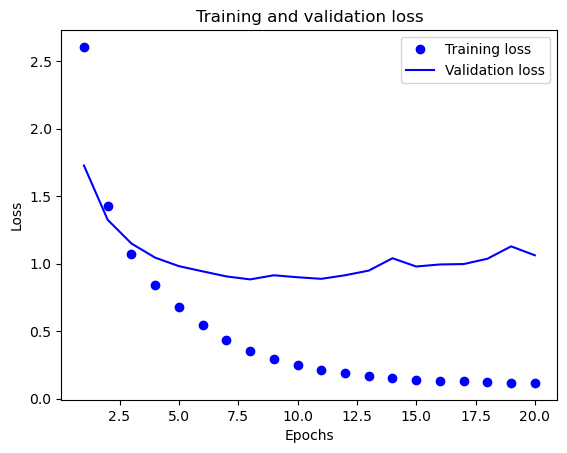

In [31]:
# now we plot the loss and accuracy of the model on training and validation data
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

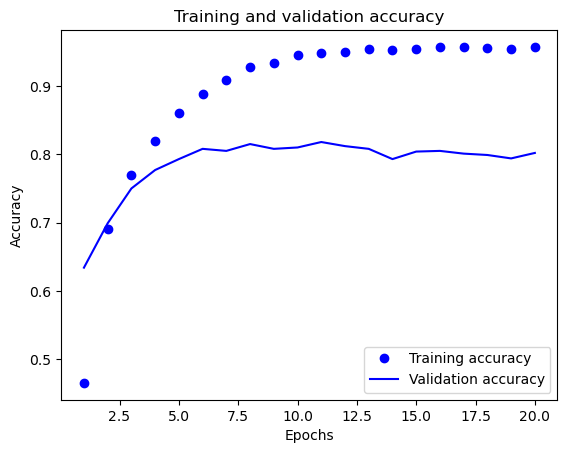

In [32]:
plt.clf()                          
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The training starts to overfit around the 8-9 epochs and then is constant and training it any further will not increase the accuracy and reduce loss so it is better to stop at that point. 

## 4. Run the model with the training 
We need to run 9 epochs rather than 20 seen earlier. 

In [36]:
cl_model.fit(x_train, 
             y_train, 
             epochs=5, 
             batch_size=512)
results = cl_model.evaluate(x_test, y_test)

Epoch 1/5
18/18 [==============================] - 0s 11ms/step - loss: 0.1053 - accuracy: 0.9558
Epoch 2/5
18/18 [==============================] - 0s 10ms/step - loss: 0.1057 - accuracy: 0.9562
Epoch 3/5
18/18 [==============================] - 0s 13ms/step - loss: 0.1050 - accuracy: 0.9551
Epoch 4/5
18/18 [==============================] - 0s 11ms/step - loss: 0.1052 - accuracy: 0.9549
Epoch 5/5
71/71 [==============================] - 0s 760us/step - loss: 1.3739 - accuracy: 0.7876


In [37]:
print(f"Results: {results}")

Results: [1.373913049697876, 0.7876224517822266]


## 5. Prediction with external set 


In [38]:
x_pred = cl_model.predict(x_test)  # this will give the probability of each class for each test sample

71/71 [==============================] - 0s 794us/step


In [41]:
#print(f"Prediction for first test sample: {x_pred[0]}")
print(f"shape of prediction: {x_pred.shape}")
print(f"sum of probabilities: {np.sum(x_pred[0])}")

shape of prediction: (2246, 46)
sum of probabilities: 0.9999999403953552


In [42]:
print(f"Categorical prediction for first test sample: {np.argmax(x_pred[0])}")

Categorical prediction for first test sample: 3


## Impact of reducing the length of intermediate layers 
We have to be clear about reducing the size of the layer in intermediate layer. In a classifer problem when we have multi class classifier we should not have a layer that is much less than the number of categories 

In [55]:
l_model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(10000,)),  # input shape is 10k dim vector
        keras.layers.Dense(4, activation='relu'),  # 2 hidden layers - very small layer model
        keras.layers.Dense(46, activation='softmax')  # output layer with 46 classes so softmax that give probability on each class
])

l_model.compile(
            optimizer='rmsprop',             # rmsprop is a good optimizer for this kind of problem
            loss='categorical_crossentropy', # categorical cross entropy is used for multi class classification
            metrics=['accuracy'])

l_model.fit(partial_x_train,
            partial_y_train,
            epochs=20,
            batch_size=512,
            validation_data=(x_val, y_val))

l_results = l_model.evaluate(x_test, y_test)

Epoch 1/20
16/16 [==============================] - 0s 16ms/step - loss: 3.5002 - accuracy: 0.1957 - val_loss: 3.1816 - val_accuracy: 0.2280
Epoch 2/20
16/16 [==============================] - 0s 11ms/step - loss: 3.0269 - accuracy: 0.2259 - val_loss: 2.8140 - val_accuracy: 0.2360
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 2.6795 - accuracy: 0.2338 - val_loss: 2.5290 - val_accuracy: 0.2420
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 2.4133 - accuracy: 0.2484 - val_loss: 2.2987 - val_accuracy: 0.2500
Epoch 5/20
16/16 [==============================] - 0s 13ms/step - loss: 2.1639 - accuracy: 0.3103 - val_loss: 2.0852 - val_accuracy: 0.5500
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 1.9321 - accuracy: 0.5928 - val_loss: 1.9086 - val_accuracy: 0.5860
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 1.7470 - accuracy: 0.6191 - val_loss: 1.7905 - val_accuracy: 0.5980
Epoch 8/20
16

In [58]:
print(f"l_model accurracy: {l_results[1]}, l_model loss: {l_results[0]}") # 61% accuracy

l_model accurracy: 0.6162065863609314, l_model loss: 1.6880922317504883
